# Boston Bluebikes Data Investigation
## by Ayman Metwally

## Investigation Overview

* In this investigation, I will go through the following questions:
1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?
4. What is the most active stations?

## Dataset Overview

* This document explores a dataset containing about 2.5 millions bike trips across **Boston** City through **2019** including start & end stations & times, users types, genders & birth years.
* You can find it [here](https://www.bluebikes.com/system-data).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('boston_2019.csv')
df = df.query('tripduration <= 75')
df = df.query('age <= 65')

In [3]:
# convert month column into a category dtype
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December']
months_order = pd.api.types.CategoricalDtype(months, ordered=True)
df.month = df.month.astype(months_order)

In [4]:
# convert week column into a category dtype
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_order = pd.api.types.CategoricalDtype(week_days, ordered=True)
df.weekday = df.weekday.astype(week_order)

In [5]:
color = sb.color_palette()

## Most Trips During Time of Day, Day of The Week & Month of The Year

* September has the most trips over the year with 363185 trips with a perdent of 14.4%.
* The third quarter of the year has the most trips with a combined percent of 40.4%.
* September 20th has the most trips over the year with 14282 trips.
* Wednesday has the most trips over the week with 389441 trips.
* Weekends has the least trips comparing to workdays.
* Hourly distribution has two peaks @ two timeframes (08:00-09:00) & (17:00-18:00) hours.

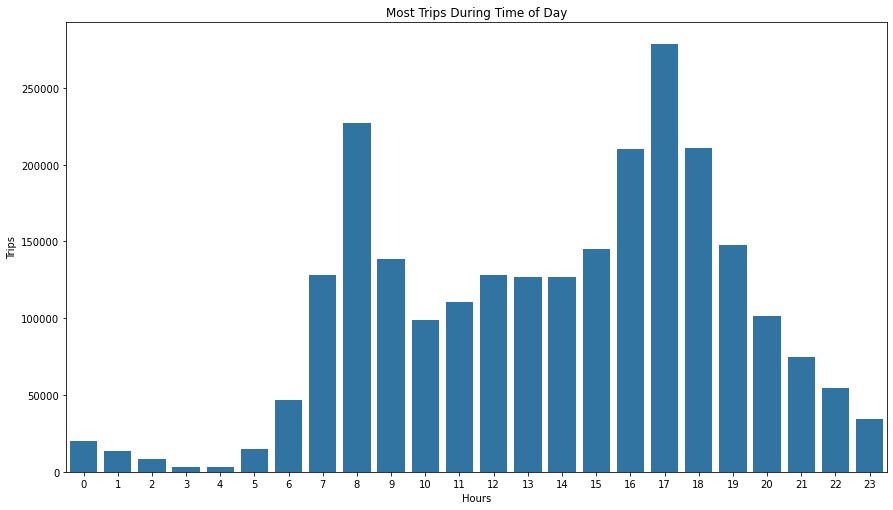

In [6]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(x=df.hour, color=color[0])
plt.xlabel('Hours')
plt.ylabel('Trips')
plt.title('Most Trips During Time of Day');

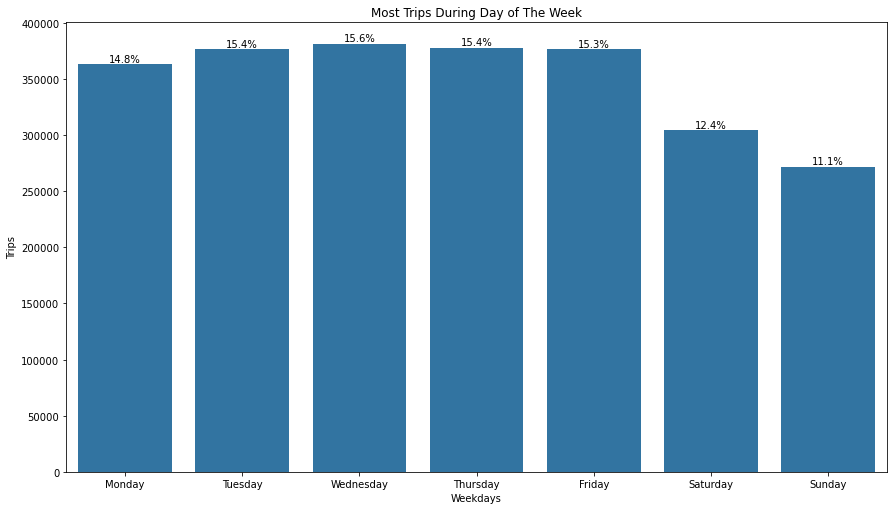

In [7]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(x=df.weekday, color=color[0])
plt.xlabel('Weekdays')
plt.ylabel('Trips')
plt.title('Most Trips During Day of The Week')
for ind, week in enumerate(week_days):
    counts = df.weekday.value_counts().loc[week]
    x = counts / df.shape[0] *100
    plt.text(ind, counts+2000, '{:0.01f}%'.format(x), ha='center');

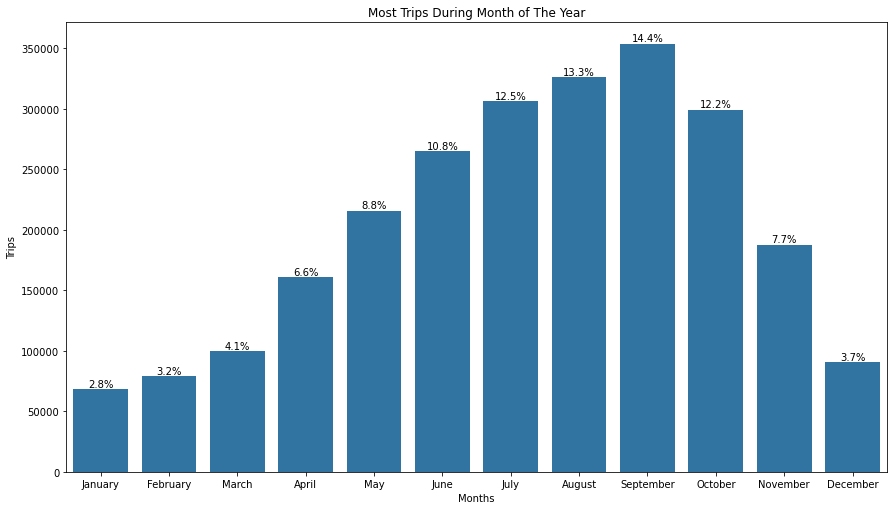

In [8]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(x=df.month, color=color[0])
plt.xlabel('Months')
plt.ylabel('Trips')
plt.title('Most Trips During Month of The Year')
for ind, mon in enumerate(months):
    counts = df.month.value_counts().loc[mon]
    x = counts / df.shape[0] *100
    plt.text(ind, counts+2000, '{:0.01f}%'.format(x), ha='center');

## Trips Duration Distribution

* Trips duration distribution is much skewed to the right (shorter trips) with a peak @ (6:9 mins) bin & a mean of 14.8 minutes.

In [9]:
df.tripduration.mean()

14.837424193492444

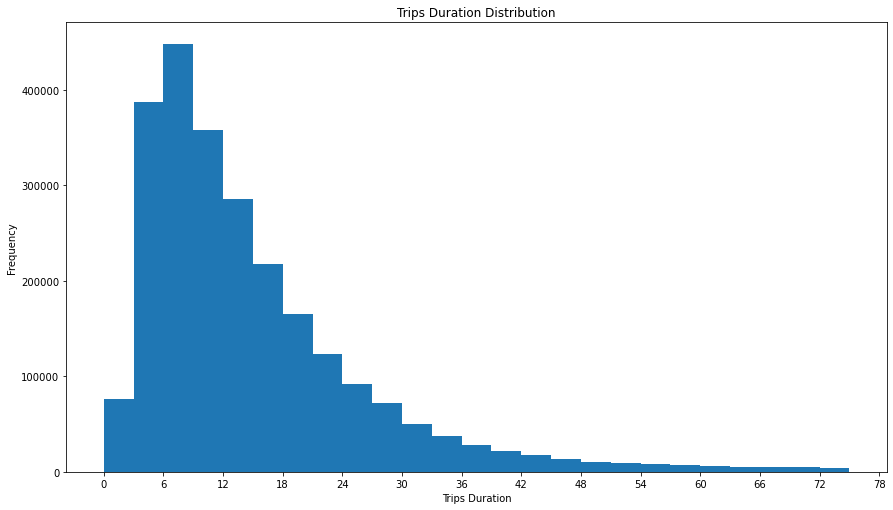

In [10]:
plt.figure(figsize=[14.70, 8.27])
bins = np.arange(0, 75+3, 3)
plt.hist(df.tripduration, bins=bins);
ticks = np.arange(0, 75+6, 6)
plt.xticks(ticks, ticks)
plt.title('Trips Duration Distribution')
plt.xlabel('Trips Duration')
plt.ylabel('Frequency');

## Average Trip Duration of Different Users Type

* Subscribers have much shorter trips on average duration than customers through all months & all weekdays.
* Heatmaps show some differences on avergae trips duration distributions between both types.
* Subscribers are used to have longer trips from 2 am to 4 am & slightly shorter trips thoughout the day on work days whereas customers are used to have shorter trips from 4 am to 9 am & longer trips thoughout the day on work days.
* Both types have the same distributions on weekends except that customers have longer trips.

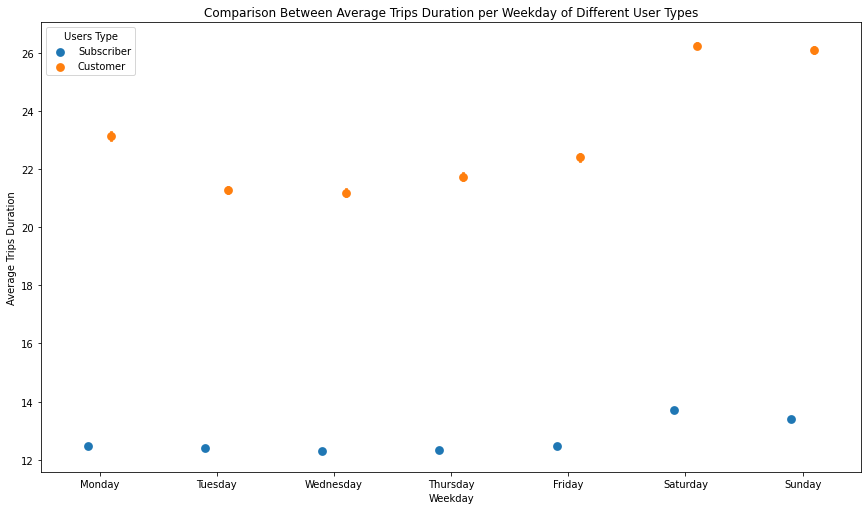

In [11]:
plt.figure(figsize=[14.70, 8.27])
sb.pointplot(data=df, x='weekday', y='tripduration', hue='usertype', linestyles='', dodge=0.2)
plt.title('Comparison Between Average Trips Duration per Weekday of Different User Types')
plt.legend(title='Users Type')
plt.xlabel('Weekday')
plt.ylabel('Average Trips Duration');

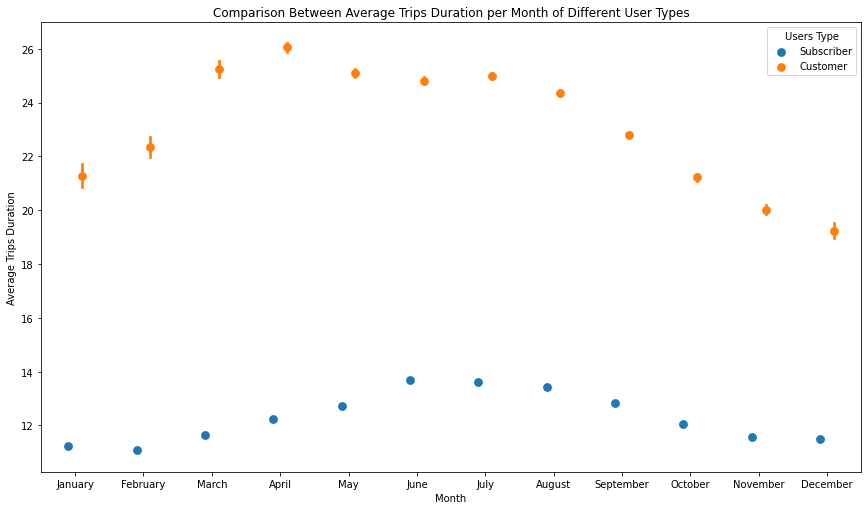

In [12]:
plt.figure(figsize=[14.70, 8.27])
sb.pointplot(data=df, x='month', y='tripduration', hue='usertype', linestyles='', dodge=0.2)
plt.title('Comparison Between Average Trips Duration per Month of Different User Types')
plt.legend(title='Users Type')
plt.xlabel('Month')
plt.ylabel('Average Trips Duration');

In [13]:
# Investigating hourly average trip duration distribution across weekdays of customers & subscribers
hour_weekday = df.groupby(['weekday', 'usertype', 'hour']).tripduration.mean().reset_index()
cust = hour_weekday.query('usertype == "Customer"')
customer = cust.pivot('weekday', 'hour', 'tripduration')
subs = hour_weekday.query('usertype == "Subscriber"')
subscriber = subs.pivot('weekday', 'hour', 'tripduration')

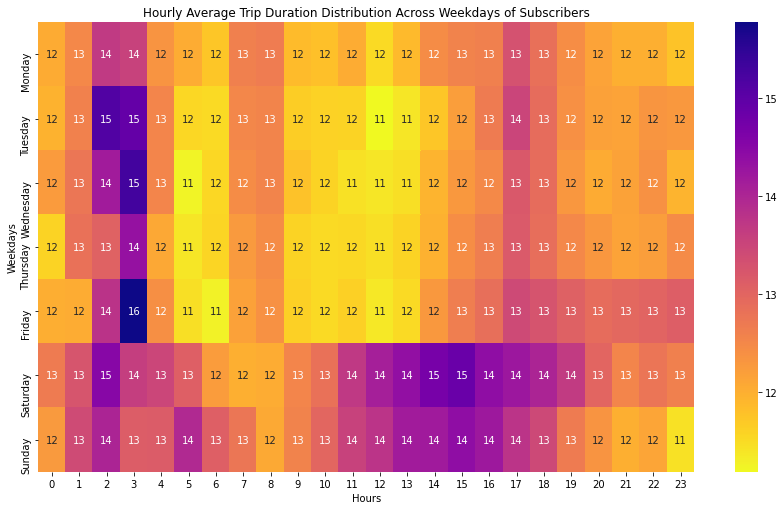

In [14]:
plt.figure(figsize=[14.70, 8.27])
sb.heatmap(data=subscriber, cmap='plasma_r', annot=True)
plt.title('Hourly Average Trip Duration Distribution Across Weekdays of Subscribers')
plt.xlabel('Hours')
plt.ylabel('Weekdays');

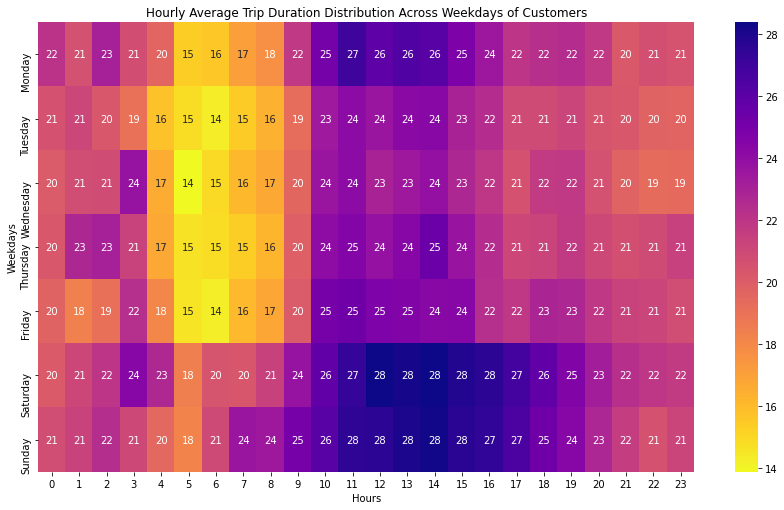

In [15]:
plt.figure(figsize=[14.70, 8.27])
sb.heatmap(data=customer, cmap='plasma_r', annot=True)
plt.title('Hourly Average Trip Duration Distribution Across Weekdays of Customers')
plt.xlabel('Hours')
plt.ylabel('Weekdays');

## The most active stations

* The top two start & end stations are:

No. | Station | Start Times | End Times
--- | --- | --- | ---
1 | MIT at Mass Ave / Amherst St | 60149 | 56255
2 | Central Square at Mass Ave / Essex St | 50345 | 50861

* The top two common trips (from start to end) are:

1. From **MIT Pacific St at Purrington St** to **MIT Stata Center at Vassar St / Main St** with 4942 occurrences
2. From **MIT Stata Center at Vassar St / Main St** to **MIT Pacific St at Purrington St** with 4884 occurrences

In [16]:
top_start = df.start_name.value_counts()[:10]
top_end = df.end_name.value_counts()[:10]

top_trips = pd.read_csv('top_trips_2019.csv')

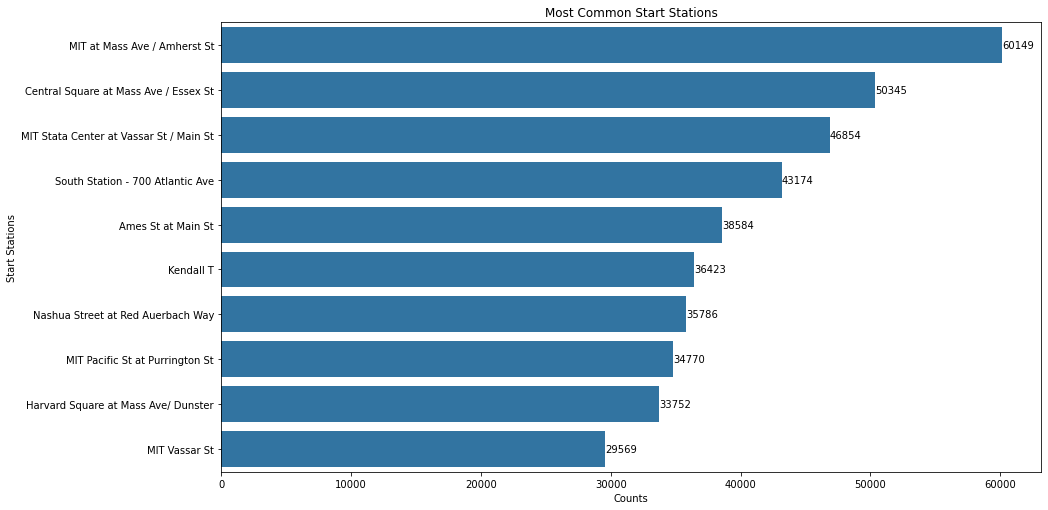

In [17]:
plt.figure(figsize=[14.70, 8.27])
sb.barplot(y=top_start.index, x=top_start, color=color[0])
plt.title('Most Common Start Stations')

for ind, count in enumerate(top_start):
    plt.text(count+10, ind, count, va='center')
plt.ylabel('Start Stations')
plt.xlabel('Counts');

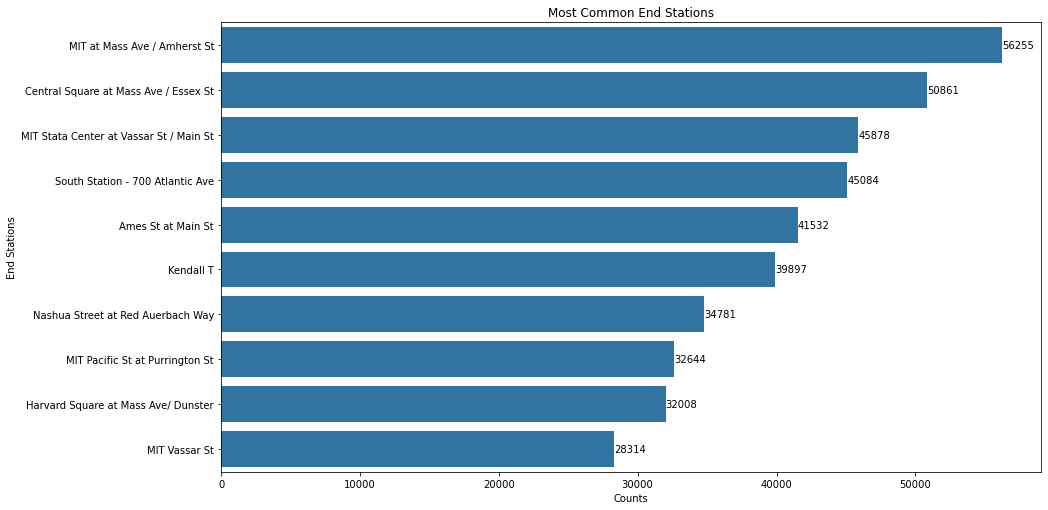

In [18]:
plt.figure(figsize=[14.70, 8.27])
sb.barplot(y=top_start.index, x=top_end, color=color[0])
plt.title('Most Common End Stations')
for ind, count in enumerate(top_end):
    plt.text(count+10, ind, count, va='center')
plt.ylabel('End Stations')
plt.xlabel('Counts');

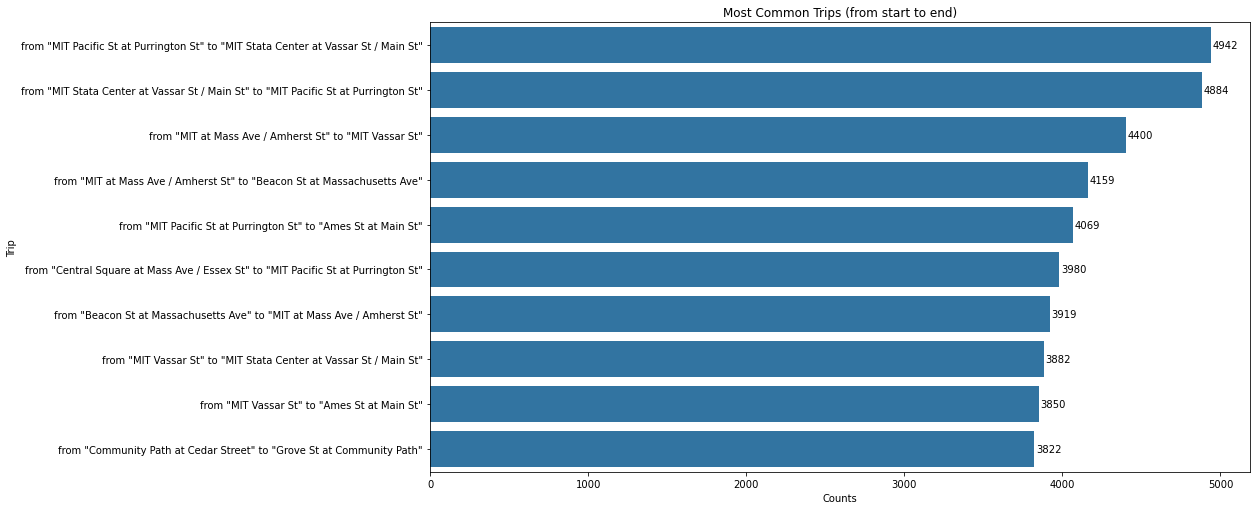

In [19]:
# Visualizing most common trips (from start to end)
plt.figure(figsize=[14.70, 8.27])
sb.barplot(x=top_trips[:10].counts, y=top_trips[:10].trip, color=color[0])
plt.title('Most Common Trips (from start to end)')

for ind, count in enumerate(top_trips[:10].counts):
    plt.text(count+10, ind, count, va='center')
plt.ylabel('Trip')
plt.xlabel('Counts');

### Diving into the top two common trips

1. Trips on each working day are almost twice that on each weekend days
2. Trips from **MIT Pacific St at Purrington St** to **MIT Stata Center at Vassar St / Main St** has two peaks @ two timeframes (08:00-09:00) & (09:00-10:00) hours
3. From **MIT Stata Center at Vassar St / Main St** to **MIT Pacific St at Purrington St** has two peaks @ two timeframes (17:00-18:00) & (18:00-19:00) hours
4. These suggest that people who lives near **MIT Stata Center at Vassar St / Main St** go to their work near **MIT Pacific St at Purrington St** in the morning and return at the end of the day *using __bicycles__*.

In [20]:
# Defining a function to query data of the trips by their order in the previous table
def query_data(data, order:int):
    """
    To query the data of the trips by their order in the previous table from the main dataframe df
    """
    start = top_trips.start_name[order-1]
    end = top_trips.end_name[order-1]
    final = data.query('start_name == @start & end_name == @end')
    name = top_trips.trip[order-1]
    return final, name

In [21]:
first_top_trip, first_name = query_data(df, 1)
second_top_trip, second_name = query_data(df, 2)

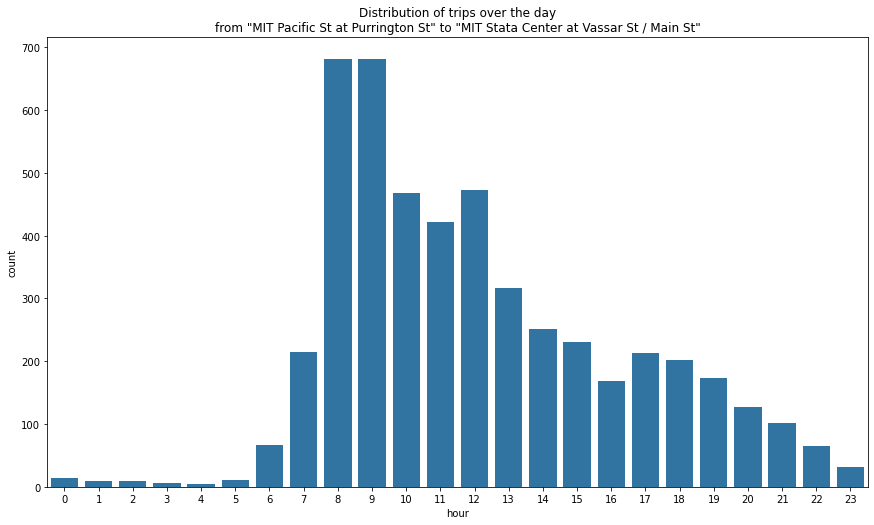

In [22]:
# Visualizing trips distribution per day for first trip
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=first_top_trip, x='hour', color=color[0])
plt.title('Distribution of trips over the day\n{}'.format(first_name));

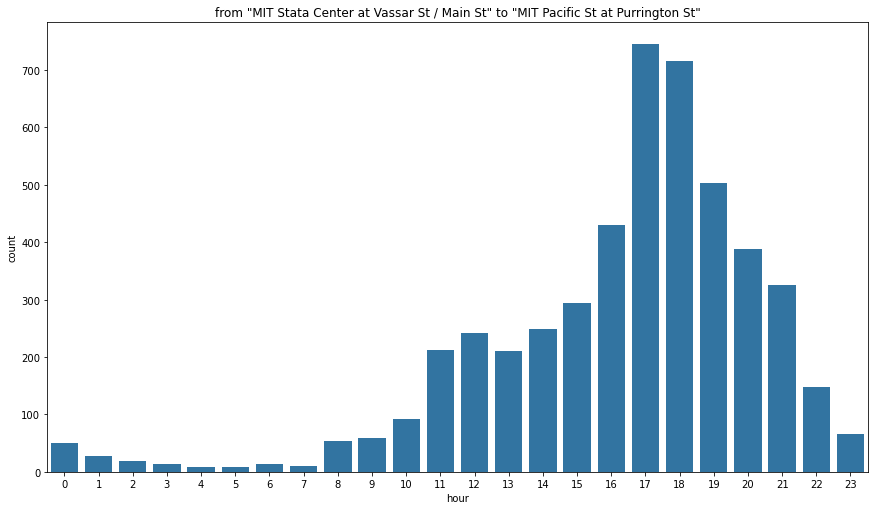

In [23]:
# Visualizing trips distribution per day for second trip
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=second_top_trip, x='hour', color=color[0])
plt.title('{}'.format(second_name));

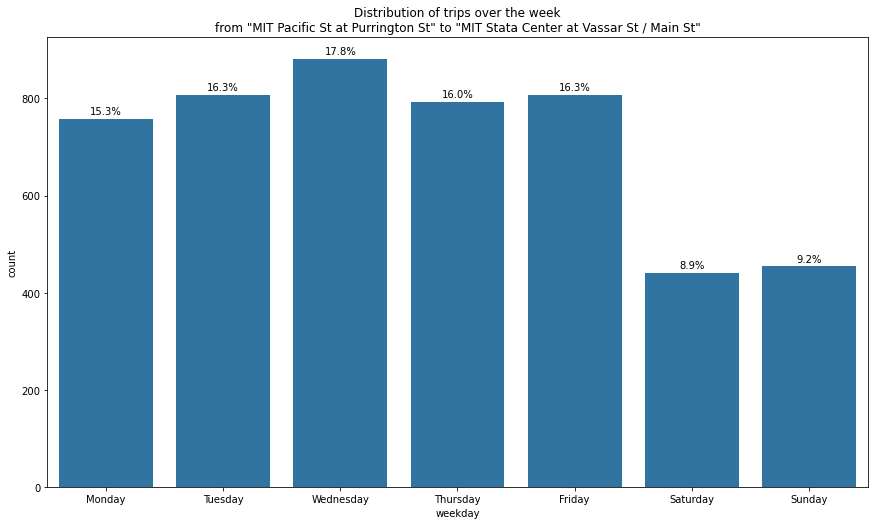

In [24]:
# Visualizing trips distribution per week for first trip
plt.figure(figsize=[14.70, 8.27])
sb.countplot(x=first_top_trip.weekday, color=color[0]);
for ind, week in enumerate(week_days):
    counts = first_top_trip.weekday.value_counts().loc[week]
    x = counts / first_top_trip.shape[0] *100
    plt.text(ind, counts+10, '{:0.01f}%'.format(x), ha='center')
plt.title('Distribution of trips over the week\n{}'.format(first_name));

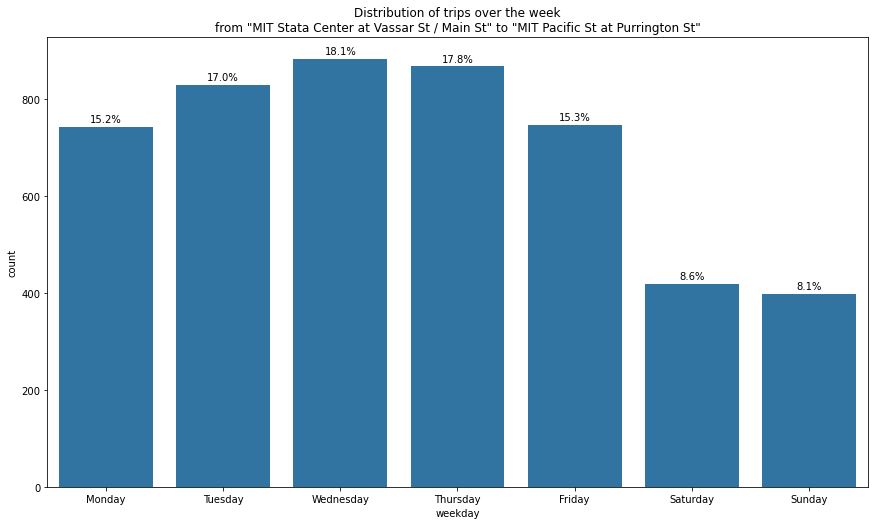

In [25]:
# Visualizing trips distribution per week for second trip
plt.figure(figsize=[14.70, 8.27])
sb.countplot(x=second_top_trip.weekday, color=color[0]);
for ind, week in enumerate(week_days):
    counts = second_top_trip.weekday.value_counts().loc[week]
    x = counts / second_top_trip.shape[0] *100
    plt.text(ind, counts+10, '{:0.01f}%'.format(x), ha='center')
plt.title('Distribution of trips over the week\n{}'.format(second_name));

In [26]:
#!jupyter nbconvert boston_2019_bluebikes_data_slides.ipynb --to slides --template output_toggle --post serve
!jupyter nbconvert --to slides --TemplateExporter.exclude_input=True boston_2019_bluebikes_data_slides.ipynb

[NbConvertApp] Converting notebook boston_2019_bluebikes_data_slides.ipynb to slides
[NbConvertApp] Writing 1092884 bytes to boston_2019_bluebikes_data_slides.slides.html
